In [ ]:
# https://towardsai.net/p/l/5-popular-machine-learning-algorithms?utm_source=twitter&utm_medium=social&utm_campaign=rop-content-recycle&fbclid=IwAR2jNSB0RujleGa5xtYIYD2WSHhQ1Jtb5b4Ir1dFfsJKizbbv0jejSXFIeQ

# 5 Popular ML Algorithms

## Linear Regression

#### Problem Formulation
---
some `dependent` variable 𝑦 on the set of `independent` variables 𝐱 = (𝑥₁, …, 𝑥ᵣ),

where 𝑟 is the number of predictors,

you assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. 
    
This equation is the regression equation.

𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression `coefficients`, and 𝜀 is the `random error`. or `intercept`

Linear regression calculates the `estimators` of the regression coefficients or simply the `predicted weights`,

denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ (weight)

The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the `residuals` 

`Regression is about determining the best predicted weights, that is the weights corresponding to the smallest residuals.`

#### To get the best weights
---

you usually minimize the sum of squared residuals (SSR) 

for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². 
    
This approach is called the method of ordinary least squares.

#### Regression Performance 
---
The variation of actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, occurs partly due to the dependence on the predictors 𝐱ᵢ.

`However`, there is also an additional inherent variance of the output.

The `coefficient of determination`, denoted as 𝑅², 
tells you which `amount of variation in 𝑦` can be explained by the dependence on 𝐱 using the particular regression model.

Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

The value `𝑅² = 1 corresponds to SSR = 0`, that is to the perfect fit since the values of predicted and actual responses fit completely to each other.

$R^2 = \frac{SSE}{SST} = 1 - \frac{SSR}{SST}$

- SST (Total Sum of Squre)

SST = $\sum_{i=1}^n(y_i - \bar{y})^2$

- SSE (Explanined Sum of Squares)

SSE = $\sum_{i=1}^n(\hat{y_i} - \bar{y})^2$

- SSR (Sum of square Residuals)

SSR = $\sum_{i=1}^n(y_i - \hat{y})^2$

---
$\bar{y}$ : 추정치의 평균, 
$\hat{y}$ : 추정치, 
y : 관측값


### Multiple Linear Regression


- Multiple or multivariate linear regression is a case of linear regression with two or more independent variables.
-  The `estimated regression function` is 𝑓(𝑥₁, …, 𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ +𝑏ᵣ𝑥ᵣ, and there are `𝑟 + 1 weights` to be determined when the number of inputs is 𝑟.

### Polynomial Regression


- polynomial regression as a generalized case of linear regression

-  `linear terms` like 𝑏₁𝑥₁, your regression function 𝑓 can `include non-linear` terms such as 𝑏₂𝑥₁², 𝑏₃𝑥₁³, or even 𝑏₄𝑥₁𝑥₂, 𝑏₅𝑥₁²𝑥₂, and so on.

- you can solve the polynomial regression problem as a linear problem with the term `𝑥²` regarded as an `input variable.`

###  Underfitting and Overfitting
- implementing polynomial regression is related to the choice of the optimal degree of the polynomial regression function.

> Underfitting
- low 𝑅² with known data and bad generalization

> Overfitting
- 𝑅². However, they often don’t generalize well and have significantly lower 𝑅² when used with new data

# Python code 

In [1]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Load DataSet
iris = sns.load_dataset('iris')

# Create a model 
'''
Parameters
- fit_intercept : (True by default) that decides whether to calculate the intercept 𝑏₀ (True) 
                   or consider it equal to zero (False).
- normalize :  (False by default) that decides whether to normalize the input variables (True) or not (False).
- copy_X : (True by default) that decides whether to copy (True) or overwrite the input variables (False).
- n_jobs  : parallel computation. None usually means one job and -1 to use all processors.
'''

model = LinearRegression()

In [3]:
# Data preprocessing 
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()
iris.species = labeler.fit_transform(iris.species)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# y : sepal_length
y = iris.iloc[:, 0 ]
# x : sepal_width, petal_length, petal_width, species
x = iris.iloc[:, 1: ]

# make Multiple Linear Regression
'''
.fit() calc optimal values of the weights using existing data 
Retrun model itself
'''
model.fit(x, y)

LinearRegression()

In [5]:
# Get Result 
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8621931701975809


In [6]:
print('intercept:', model.intercept_)

intercept: 1.8511983449847396


In [7]:
print('slope:', model.coef_)

slope: [ 0.62527882  0.74292448 -0.40447855 -0.22635635]


In [8]:
# Predict 
y_pred = model.predict([[4, 3, 2, 0]])
print('predicted response:', y_pred, sep='\n')

predicted response:
[5.77212994]


In [9]:
y_pred = model.intercept_ + sum(model.coef_ * [4, 3, 2, 0])
print('predicted response:', y_pred, sep='\n')

predicted response:
5.772129944632768


In [ ]:
# Polynomial Regression

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# build model 
'''
degree : (2 by default) that represents the degree of the polynomial regression function.
interaction_only: (False by default) that decides whether to include only interaction features (True) or 
                   all features (False).
include_bias :  (True by default) that decides whether to include the bias 
                (intercept) column of ones (True) or not (False).

'''
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)

In [12]:
x.head(3)

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0


In [15]:
x_[0]

array([ 3.5 ,  1.4 ,  0.2 ,  0.  , 12.25,  4.9 ,  0.7 ,  0.  ,  1.96,
        0.28,  0.  ,  0.04,  0.  ,  0.  ])

In [16]:
model = LinearRegression().fit(x_, y)

In [17]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8839311018040977
intercept: 2.4518715427668445
coefficients: [ 0.23631182  0.86046204  0.80525197 -1.91538668  0.10697611 -0.22558741
  0.06213234  0.34847336  0.10858724 -0.22423945 -0.02653654 -0.80270774
  1.63174094 -0.65514036]


In [ ]:
tmp_x = [[4, 3, 2, 0]]
tmp_x = transformer.transform(tmp_x)
y_pred = model.predict(tmp_x)
print('predicted response:', y_pred, sep='\n')

### Advanced Linear Regression 

In [18]:
import numpy as np
import statsmodels.api as sm

In [19]:
print(x.head(3))

   sepal_width  petal_length  petal_width  species
0          3.5           1.4          0.2        0
1          3.0           1.4          0.2        0
2          3.2           1.3          0.2        0


In [21]:
'''
You need to add the column of ones to the inputs 
if you want statsmodels to calculate the intercept 𝑏₀. 
It doesn’t takes 𝑏₀ into account by default. This is just one function call:
'''

x = sm.add_constant(x)
print(x.head(3))

   const  sepal_width  petal_length  petal_width  species
0    1.0          3.5           1.4          0.2        0
1    1.0          3.0           1.4          0.2        0
2    1.0          3.2           1.3          0.2        0


In [23]:
# create model
model = sm.OLS(y, x) # careful!!!! not x,y y,x!

results = model.fit()

In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     226.8
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           2.51e-61
Time:                        15:39:39   Log-Likelihood:                -35.397
No. Observations:                 150   AIC:                             80.79
Df Residuals:                     145   BIC:                             95.85
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.8512      0.248      7.451   

In [ ]:
- OLS : Ordinary Least Squares (== least squares approximation, 최소 자승법)
- No. Observations: Number of observations (총 표본 수)
- Df Residuals:  DF(Degree of Freedom) 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구함
- Df Model: 독립변수의 개수이다
- R squared: R의 제곱이라는 뜻이고 결정계수를 의미 (해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력)
- F-statistics: F통계량을 뜻한다. F통계량은 MSR/MSE로 구할 수 있다
- Prob: F통계량에 해당하는 P-value를 의미
- coef:  coefficient는 회귀식의 절편 값
- Standard Error : standard deviation of an estimated coefficient
    - The smaller the SE, the more precise is our estimate of the coefficient
- t-Statistic : ratio of the estimated coefficient to its standard error
- p-Values and Significance Tests :
    -  우리가 얻은 검정 통계량보다 크거나 같은 값을 얻을 수 있을 확률

In [ ]:
print('coefficient of determination:', results.rsquared, "\n")
print('adjusted coefficient of determination:', results.rsquared_adj, "\n")
print('regression coefficients:', results.params, "\n")

In [ ]:
print('predicted response:', results.predict(x), sep='\n')
# print('predicted response:', results.fittedvalues, sep='\n')

## How to read  OLS Regression Results  

- OLS : Ordinary Least Squares (== least squares approximation, 최소 자승법)
- No. Observations: Number of observations (총 표본 수)
- Df Residuals:  DF(Degree of Freedom) 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구함
- Df Model: 독립변수의 개수이다
- R squared: R의 제곱이라는 뜻이고 결정계수를 의미 (해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력)
- F-statistics: F통계량을 뜻한다. F통계량은 MSR/MSE로 구할 수 있다
- Prob: F통계량에 해당하는 P-value를 의미
- coef:  coefficient는 회귀식의 절편 값
- Standard Error : standard deviation of an estimated coefficient
    - The smaller the SE, the more precise is our estimate of the coefficient
- t-Statistic : ratio of the estimated coefficient to its standard error
- p-Values and Significance Tests :
    -  우리가 얻은 검정 통계량보다 크거나 같은 값을 얻을 수 있을 확률

In [ ]:
print(results.summary())

# scratch to perfect

### making multiple linear regression 
- linear regression need this 
- Linear Assumption 
- NO noise
- NO Collinearity : overfit when data have highly correlatied input variables
- Normal Distribution : more reliable predictions 
- Rescaled Inputs

- multiple linear regression model calculating best coefficients for line equation formula
- best coefficients can calculated through iterative optimization process : gradient descent

> gradient Descent 

- algorithm calculates the derivates with respect to each coefficient and updates them on each iteration. 

- How much of an update there will be depends on one parameter — learning rate. 

- A high learning rate can lead to “missing” the best parameter values, and a low learning rate can lead to slow optimization.

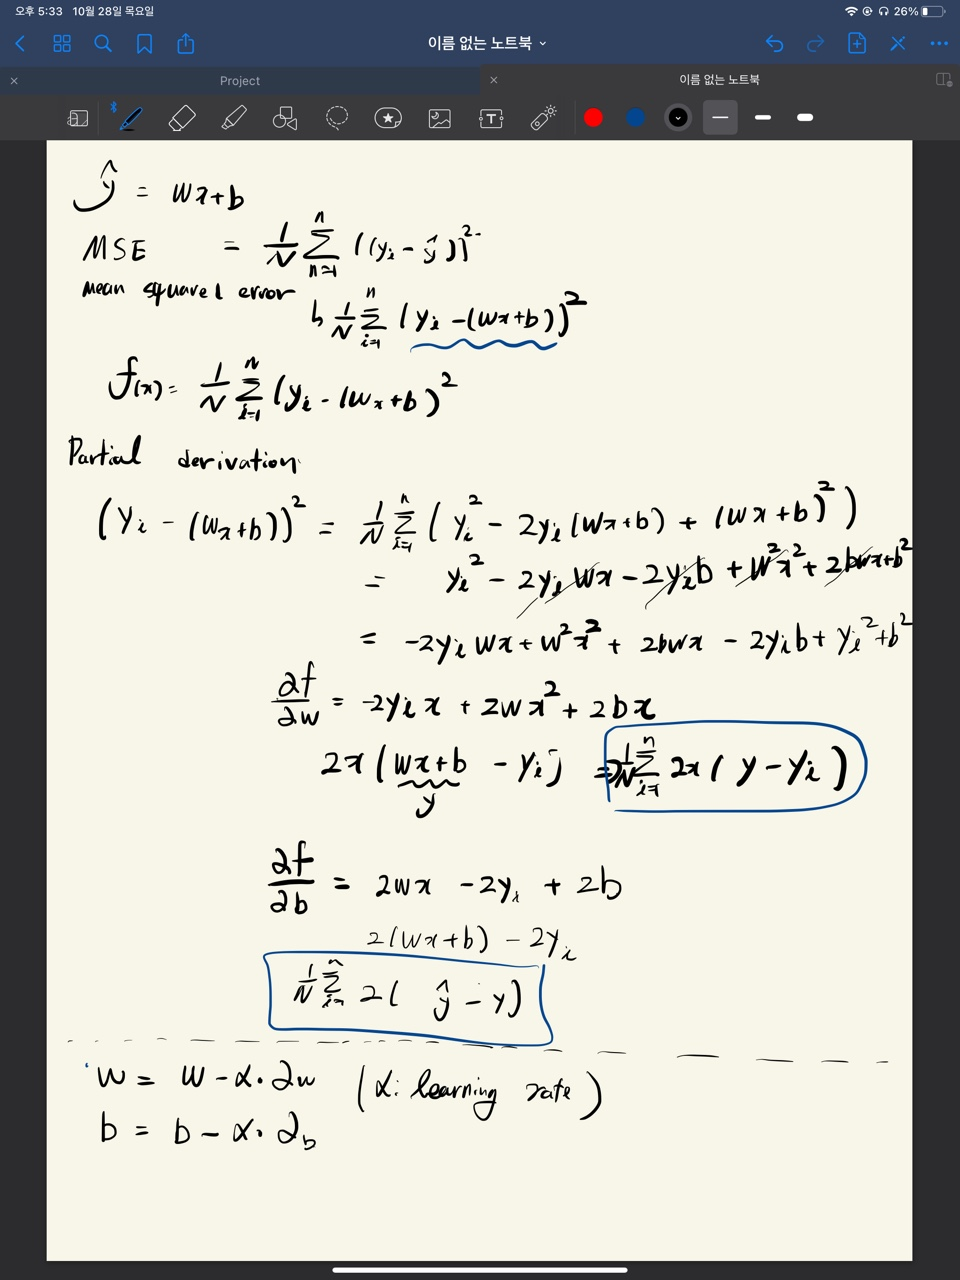

In [25]:
from IPython.display import Image 
Image("img/gradient_prob.jpeg")

## Code build start 

https://towardsdatascience.com/master-machine-learning-multiple-linear-regression-from-scratch-with-python-ac716a9b78a4

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# 선수 지식
    @staticmethod
    '''
    정적 메서드 지원 @staticmethod, @classmethod
    instance를 만들지 않아도 class 메서드를 실행 가능
    instance : 클래스에 의해 만들어진 객체!
    ''' 

In [28]:
#staticmethod
class hello:
    num = 10

    @staticmethod
    def calc(x):
        return x + 10

print(hello.calc(10))

20


In [ ]:
#classmethod
class hello:
    num = 10

    @classmethod
    def calc(cls, x):
        return x + 10

print(hello.calc(10))

- 차이가 무엇일까 ?
- 둘 다 객체를 만들지 않고 바로 해당 메서드를 사용했다. 
- classmethod는 calc 메서드를 만들때 cls 인자가 하나 추가됨 

In [ ]:
## hello class에서 num 속성 접근하는 방법
# 객체로 접근하는것이 아니기에 self.num 사용 불가하다
#staticmethod
class hello:
    num = 10

    @staticmethod
    def calc(x):
        return x + 10 + hello.num

print(hello.calc(10))
# 정적 변수로 접근해야함.. 

In [ ]:
#classmethod
class hello:
    num = 10

    @classmethod
    def calc(cls, x):
        return x + 10 + cls.num

print(hello.calc(10))
# cls 는 클래스를 가리킴, 클래스의 어떤 속성에도 접근 가능 하다 

In [37]:
class hello:
    t = '내가 상속해 줬어'

    @classmethod
    def calc(cls):
        return cls.t

class hello_2(hello):
    t = '나는 상속 받았어'

print(hello_2.calc())

나는 상속 받았어


- 그렇다고 @staticmethod는 필요 없는 것은 아니다. 사람마다 다르겠지만 유틸리티 성격에 맞게 사용할 수 있을 것이다.

- 그리고 @classmethod는 클래스의 어떤 옵션을 바꾸는 용도로 사용할 수 있다.

In [7]:
%%writefile linear.py
class LinearRegression:
    
    '''
    class implements linear regression model with gradient descent
    '''
    
    def __init__(self, learning_rate=0.01, n_iterations=100000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        import numpy as np 
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        import numpy as np 
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

Overwriting linear.py


In [1]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

In [2]:
from linear import LinearRegression

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [6]:
import matplotlib.pylab as plt

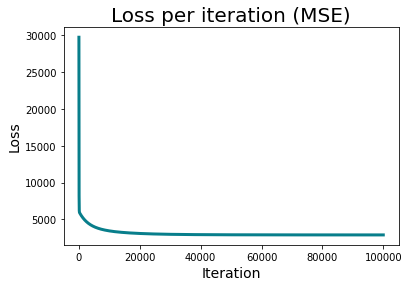

In [7]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

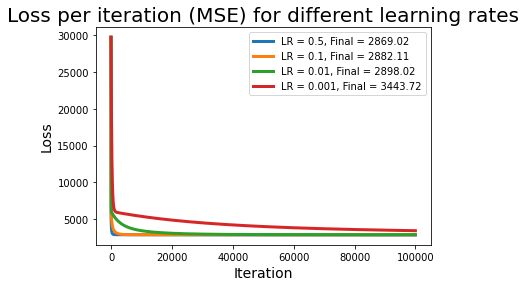

In [9]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
plt.title('Loss per iteration (MSE) for different learning rates', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

### remember that you want to calculate 𝑏₀, 𝑏₁, and 𝑏₂, which minimize SSR. These are your unknowns!

In [38]:
# OLS, Tvalue

# Lazy linear regressino,  randomforest regression, decision tree regression, Xgboost regrssion 

## Logistic Regression

## Decision Tree

## Navie Bayes Algorithms

## Artificial Neural Network Algorithms